In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv("/content/sample_data/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
print(f"""length of
diabetic : {len(df[df['Outcome'] == 1])}
non diabetic: {len(df[df['Outcome'] == 0])}""")

length of
diabetic : 268 
non diabetic: 500


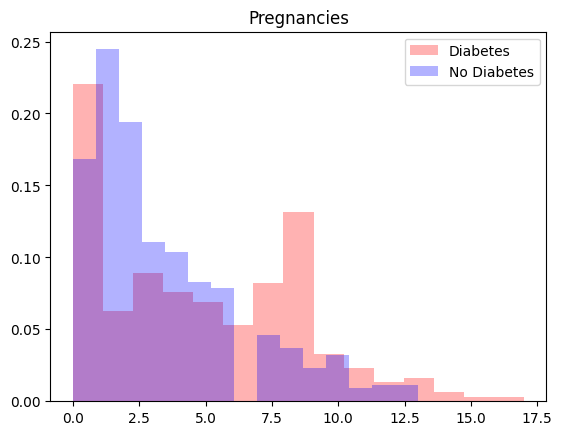

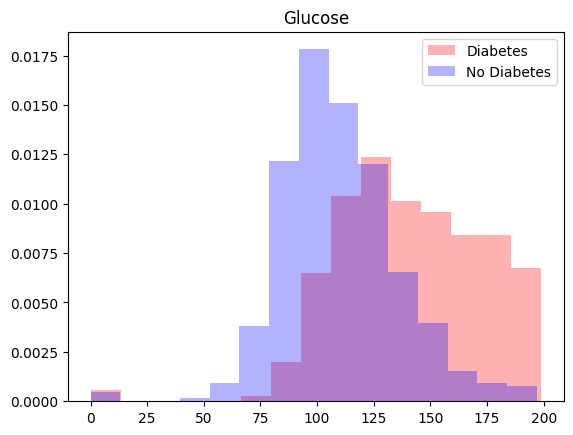

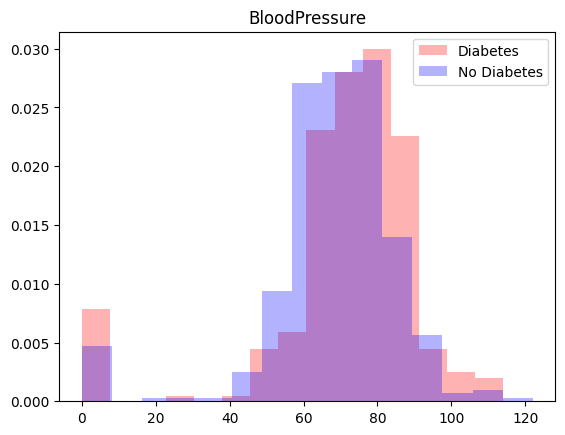

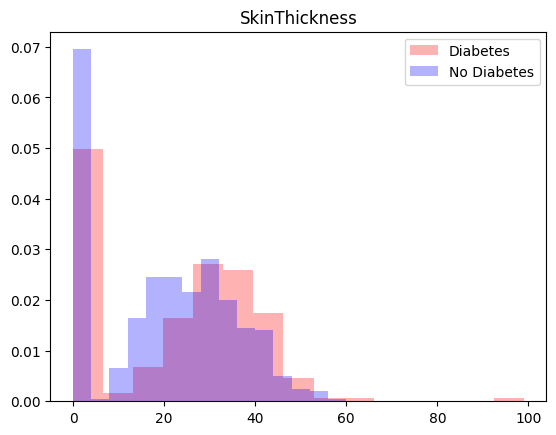

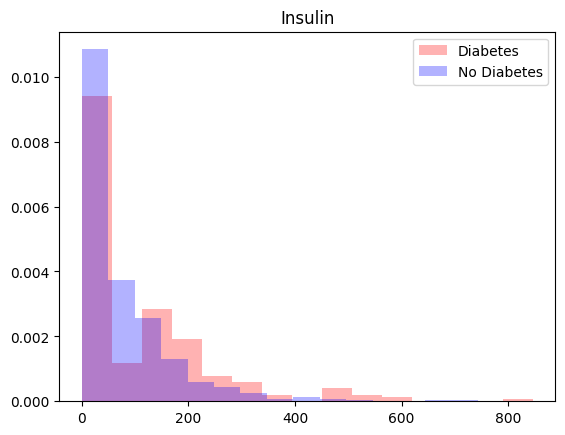

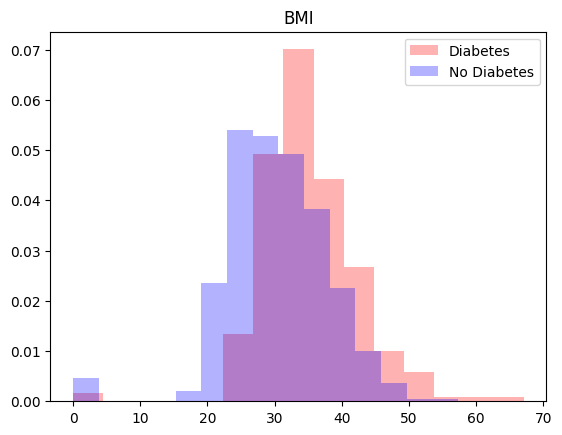

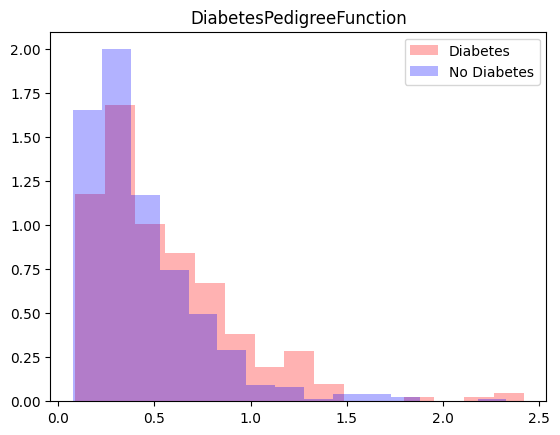

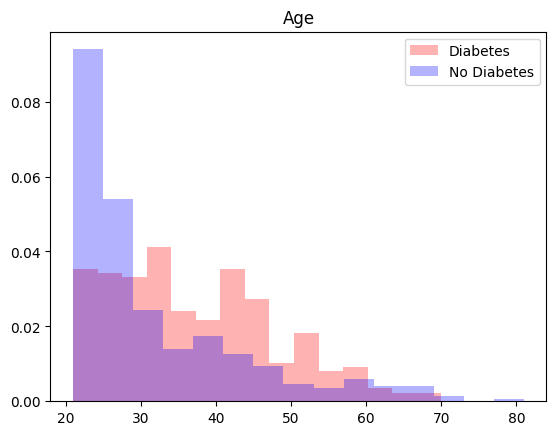

In [21]:
n = len(df.columns[:-1])

for i in range(n):
  label = df.columns[i]
  plt.hist(df[df['Outcome'] == 1][label], color = 'red', label = "Diabetes", density = True, bins = 15, alpha = 0.3)
  plt.hist(df[df['Outcome'] == 0][label], color = 'blue', label = "No Diabetes", density = True, bins = 15, alpha = 0.3)
  plt.title(label)
  plt.legend()
  plt.show()

In [23]:
# Train
X = df[df.columns[:-1]].values
# Test
Y = df[df.columns[-1]].values

In [44]:
scaler = StandardScaler()

X = scaler.fit_transform(X)


In [42]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [26]:
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [47]:
over = RandomOverSampler()
X, Y =over.fit_resample(X,Y)

In [48]:
xTrain, xTemp, yTrain, yTemp = train_test_split(X,Y, test_size = 0.4, random_state= 0)
xValid, xTest, yValid, yTest = train_test_split(X,Y, test_size = 0.5, random_state= 0)

In [49]:
model = tf.keras.Sequential([

          tf.keras.layers.Dense(32, activation= 'relu'),
          tf.keras.layers.Dense(16, activation= 'relu'),
          tf.keras.layers.Dense(1, activation= 'sigmoid')

])

In [50]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics =['accuracy'])

In [51]:
model.fit(xTrain, yTrain, batch_size = 20, epochs= 35, validation_data=(xValid, yValid))

Epoch 1/35
30/30 [==============================] - 1s 9ms/step - loss: 0.6666 - accuracy: 0.5983 - val_loss: 0.6434 - val_accuracy: 0.6700
Epoch 2/35
30/30 [==============================] - 0s 5ms/step - loss: 0.6271 - accuracy: 0.7050 - val_loss: 0.6052 - val_accuracy: 0.7160
Epoch 3/35
30/30 [==============================] - 0s 5ms/step - loss: 0.5897 - accuracy: 0.7217 - val_loss: 0.5685 - val_accuracy: 0.7360
Epoch 4/35
30/30 [==============================] - 0s 5ms/step - loss: 0.5583 - accuracy: 0.7333 - val_loss: 0.5412 - val_accuracy: 0.7420
Epoch 5/35
30/30 [==============================] - 0s 4ms/step - loss: 0.5371 - accuracy: 0.7483 - val_loss: 0.5221 - val_accuracy: 0.7540
Epoch 6/35
30/30 [==============================] - 0s 3ms/step - loss: 0.5227 - accuracy: 0.7417 - val_loss: 0.5094 - val_accuracy: 0.7540
Epoch 7/35
30/30 [==============================] - 0s 5ms/step - loss: 0.5123 - accuracy: 0.7417 - val_loss: 0.5005 - val_accuracy: 0.7480
Epoch 8/35
30/30 [==

In [52]:
model.evaluate(xTrain, yTrain)

19/19 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.7967


[0.41650593280792236, 0.79666668176651]

In [54]:
model.evaluate(xTest, yTest)

16/16 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.7960


[0.433302640914917, 0.7960000038146973]